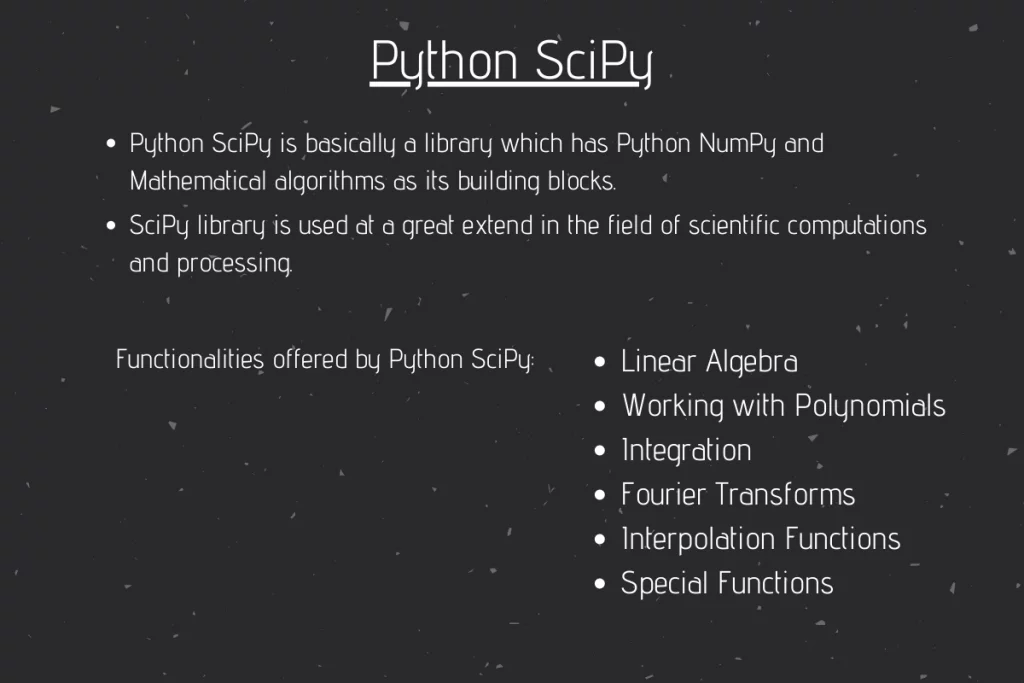

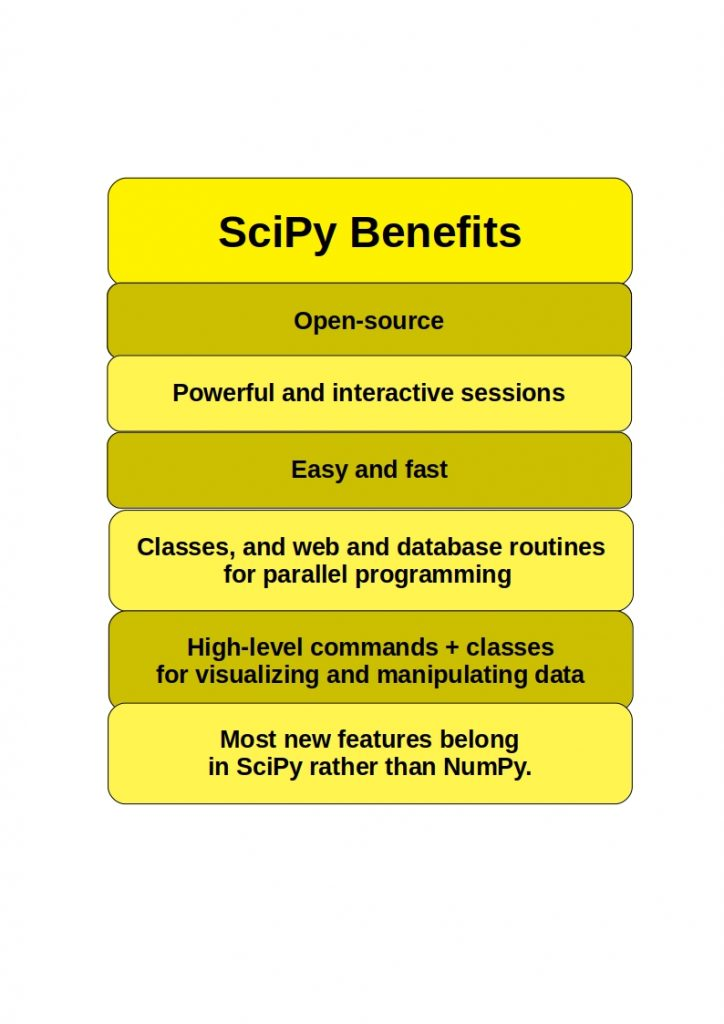

# Explanation
Creating a Sample Dataset: Generates a dataset with random values for statistical analysis.
Basic Statistics: Calculates the mean and standard deviation for the variables.
Hypothesis Testing: Performs a t-test to compare the means of two independent samples.
Correlation Analysis: Calculates the Pearson correlation coefficient between two variables.
Simple Linear Regression with Statsmodels: Fits a simple linear regression model and prints the summary.
Multiple Linear Regression with Statsmodels: Fits a multiple linear regression model and prints the summary.
Regression using Patsy formulas: Fits a regression model using Patsy formulas and prints the summary.
Residual Analysis: Plots the histogram and Q-Q plot of residuals to check for normality.
ANOVA (Analysis of Variance): Performs ANOVA to test the differences between group means.
Time Series Analysis:
Plots a time series.
Decomposes the time series into trend, seasonal, and residual components.
Plots the ACF and PACF of the time series.
Fits an ARIMA model and forecasts future values.

Mean of X: -0.10384651739409384, Standard Deviation of X: 0.9036161766446297
Mean of Y: 0.022304587049923885, Standard Deviation of Y: 0.948888640510646
T-statistic: -0.9579319437618434, P-value: 0.33926528653615606
Pearson Correlation between X and Y: -0.1364222121700025, P-value: 0.17592555489276998
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.858
Date:                Sat, 20 Jul 2024   Prob (F-statistic):              0.176
Time:                        14:07:14   Log-Likelihood:                -135.71
No. Observations:                 100   AIC:                             275.4
Df Residuals:                      98   BIC:                             280.6
Df Model:                           1                            

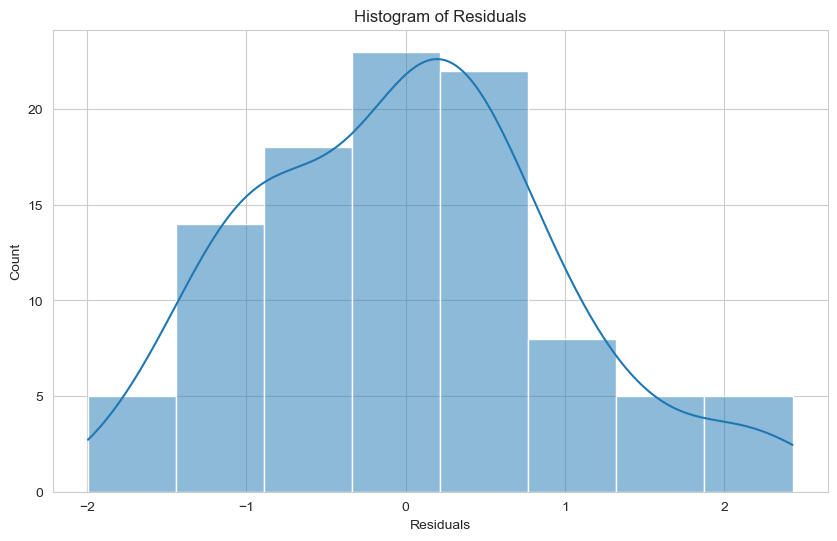

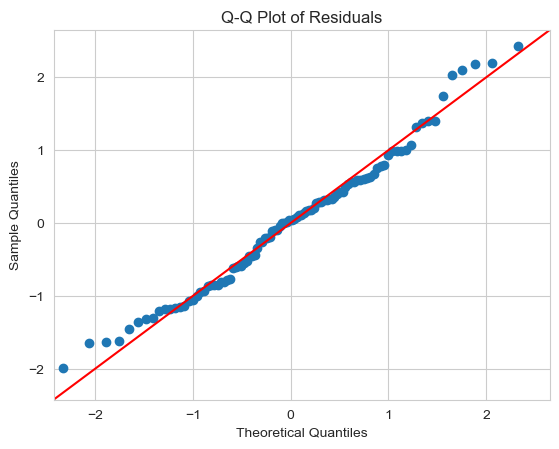

             sum_sq    df         F    PR(>F)
Group      4.770569   2.0  2.713463  0.071342
Residual  85.268396  97.0       NaN       NaN


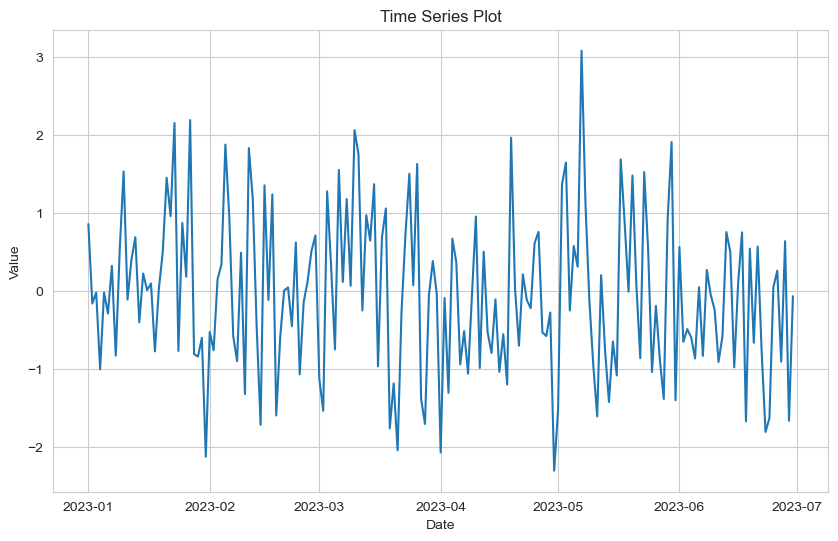

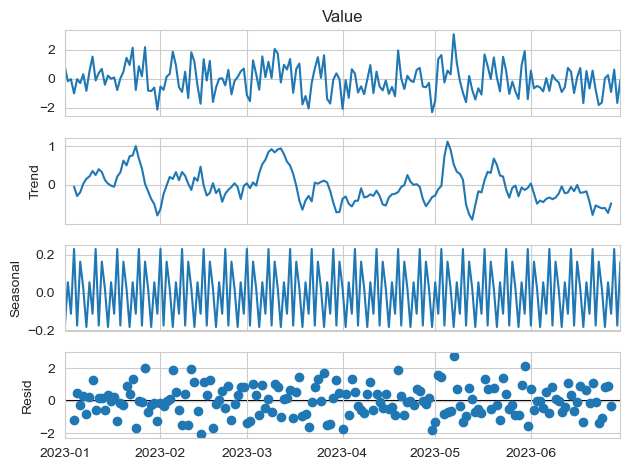

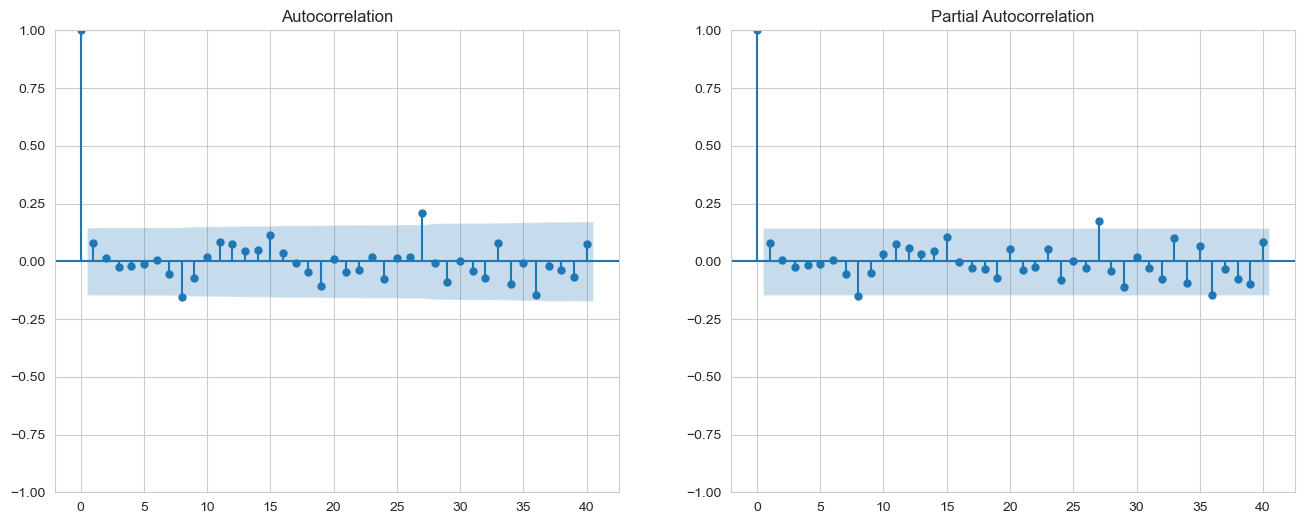

F:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  181
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -258.806
Date:                Sat, 20 Jul 2024   AIC                            525.613
Time:                        14:07:20   BIC                            538.407
Sample:                    01-01-2023   HQIC                           530.800
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0392      0.083     -0.469      0.639      -0.203       0.124
ar.L1          0.1367      0.977      0.140      0.889      -1.778       2.052
ma.L1         -0.0577      0.987     -0.058      0.9

ValueError: too many values to unpack (expected 3)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Creating a Sample Dataset
np.random.seed(42)
data = {
    'X': np.random.normal(0, 1, 100),
    'Y': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)
df['Z'] = 1.5 * df['X'] + np.random.normal(0, 1, 100)  # Creating a dependent variable

# 2. Basic Statistics
mean_X = np.mean(df['X'])
std_X = np.std(df['X'])
mean_Y = np.mean(df['Y'])
std_Y = np.std(df['Y'])
print(f"Mean of X: {mean_X}, Standard Deviation of X: {std_X}")
print(f"Mean of Y: {mean_Y}, Standard Deviation of Y: {std_Y}")

# 3. Hypothesis Testing
# T-test for the means of two independent samples
t_stat, p_value = stats.ttest_ind(df['X'], df['Y'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# 4. Correlation Analysis
correlation, p_value_corr = stats.pearsonr(df['X'], df['Y'])
print(f"Pearson Correlation between X and Y: {correlation}, P-value: {p_value_corr}")

# 5. Simple Linear Regression with Statsmodels
X = sm.add_constant(df['X'])  # Adding a constant for the intercept
model = sm.OLS(df['Y'], X).fit()
print(model.summary())

# 6. Multiple Linear Regression with Statsmodels
X_multi = df[['X', 'Z']]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(df['Y'], X_multi).fit()
print(model_multi.summary())

# 7. Regression using Patsy formulas
model_formula = smf.ols('Y ~ X + Z', data=df).fit()
print(model_formula.summary())

# 8. Residual Analysis
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot for Residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# 9. ANOVA (Analysis of Variance)
# Creating a dataset for ANOVA
df_anova = df.copy()
df_anova['Group'] = np.random.choice(['A', 'B', 'C'], 100)
anova_model = smf.ols('Y ~ Group', data=df_anova).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# 10. Time Series Analysis
# Creating a time series dataset
date_rng = pd.date_range(start='2023-01-01', end='2023-06-30', freq='D')
ts_data = np.random.randn(len(date_rng))
df_ts = pd.DataFrame(ts_data, columns=['Value'])
df_ts['Date'] = date_rng
df_ts.set_index('Date', inplace=True)

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_ts.index, df_ts['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.show()

# Decomposing the time series
decomposition = sm.tsa.seasonal_decompose(df_ts['Value'], model='additive')
decomposition.plot()
plt.show()

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sm.graphics.tsa.plot_acf(df_ts['Value'], lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_ts['Value'], lags=40, ax=axes[1])
plt.show()

# ARIMA model
arima_model = sm.tsa.ARIMA(df_ts['Value'], order=(1, 0, 1)).fit()
print(arima_model.summary())

# Forecasting with ARIMA
forecast, stderr, conf_int = arima_model.forecast(steps=30)
forecast_index = pd.date_range(start='2023-07-01', end='2023-07-30', freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower CI': conf_int[:, 0], 'Upper CI': conf_int[:, 1]}, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(df_ts.index, df_ts['Value'], label='Observed')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.15)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
